## Bengaluru House Price Predictive Model


In [1]:
# Import all the neccessary  libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")


from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error


## Read the data from the csv file

In [2]:
data = pd.read_csv("Bengaluru_House_Data.csv",encoding="latin-1")
data.head()

# Replace 'latin-1' with the actual encoding of your file if it's different from UTF-8. 
# Specifying the correct encoding should help to read the file without encountering the UnicodeDecodeError.


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07,NaN,NaN,NaN,NaN
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00,NaN,NaN,NaN,NaN
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00,NaN,NaN,NaN,NaN
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00,NaN,NaN,NaN,NaN
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00,NaN,NaN,NaN,NaN


### desccriptive analysis


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
dtypes: float64(6), object(7)
memory usage: 1.3+ MB


In [4]:
data.describe()

,bath,balcony,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,13247.000000,12711.000000,0.0,0.0,0.0,0.0
mean,2.692610,1.584376,NaN,NaN,NaN,NaN
std,1.341458,0.817263,NaN,NaN,NaN,NaN
min,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,2.000000,1.000000,NaN,NaN,NaN,NaN
50%,2.000000,2.000000,NaN,NaN,NaN,NaN
75%,3.000000,2.000000,NaN,NaN,NaN,NaN
max,40.000000,3.000000,NaN,NaN,NaN,NaN


In [5]:
data.describe(include='O')

,area_type,availability,location,size,society,total_sqft,price
count,13320,13320,13319,13304,7818,13320,13320
unique,4,81,1305,31,2688,2117,2205
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,75
freq,8790,10581,540,5199,80,843,303


In [6]:
for col in data.columns:
    print(data[col].value_counts())

    print('*'*34)


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
**********************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
**********************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
*************************

## Making the Dataset into correct format 

In [7]:
# In this Dataset Price is target variable, let's clean it
# all the special char in price variable
print(data.price.str.extract("([^\w\s])").value_counts())

# keep only numbers
data['Price'] = data.price.str.extract("(\d+)").astype(float)
data.Price.value_counts()



.    2522
?     202
     110
$      23
-       2
dtype: int64


65.0      333
75.0      331
55.0      321
45.0      301
60.0      300
         ... 
815.0       1
2250.0      1
369.0       1
343.0       1
488.0       1
Name: Price, Length: 485, dtype: int64

In [8]:
# availability feature overview
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [9]:
# Extract month from availability column
data['availability'] = data['availability'].str.extract(r'(\w{3,})')

In [10]:
# see the uniqueness in the data
print(data['size'].unique())

# extracting the size of the BHK and Bedroom
data['size'] = data['size'].str.split().str.get(0).astype(float)

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


In [11]:
# total sqft column have the '-' between the numeric values
print(data.total_sqft.unique())

# convert range number into mean and float
def sqft(s):
    temp = s.split(' - ')
    if len(temp)==2:
        return ((float(temp[0])+float(temp[1]))/2)
    try:
        return float(s)
    except:
        return None


data['total_sqft'] = data['total_sqft'].astype('str').apply(sqft)
print(data.total_sqft.unique())

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']
[1056.  2600.  1440.  ... 1258.5  774.  4689. ]


In [12]:
# removiing any extra space from location values
data['location'] = data['location'].astype('str').apply(lambda x: x.strip())

In [13]:
# analysing the location column
data.location.value_counts()

# total 1295 unique values,how many of them are smaller in count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [14]:
# if any value <= 9
loc= data.location.value_counts()

# there are total 1041 locations smaller in count
value_count_9 = loc[loc<9]

data['location'] = data['location'].apply(lambda x: 'other' if x in value_count_9 else x)
data['location'].value_counts()

other                2567
Whitefield            541
Sarjapur  Road        399
Electronic City       304
Kanakpura Road        273
                     ... 
Gollahalli              9
Kamakshipalya           9
Chandra Layout          9
Peenya                  9
Jakkur Plantation       9
Name: location, Length: 276, dtype: int64

In [15]:
# # get the all values from the value counts method
# cat_area_type = data.location.value_counts()

# loc_9 = cat_area_type[cat_area_type<9]
# loc_19 = cat_area_type[cat_area_type<19]
# loc_29 = cat_area_type[cat_area_type<29]
# loc_51 = cat_area_type[cat_area_type<51]
# loc_99 = cat_area_type[cat_area_type<99]
# loc_159 = cat_area_type[cat_area_type<159]
# loc_259 = cat_area_type[cat_area_type<259]
# def locations_bin(x):
#     if x in loc_9:
#         return 'locaction_1'
#     elif x in loc_19:
#         return 'location_2'
#     elif x in loc_29:
#         return 'location_3'
#     elif x in loc_51:
#         return 'location_4'
#     elif x in loc_99:
#         return 'location_4'
#     elif x in loc_159:
#         return 'location_5'
#     elif x in loc_259:
#         return 'location_6'
#     else:    
#         return 'location_7'
    
#     return x

# data['location'] = data['location'].apply(locations_bin)

# data['location'].value_counts()

### Society

In [16]:
# print(data.society.isna().sum())
# data.loc[data.society.isna()] = data.society.mode()[0]

# print("after filling: ", data.society.isna().sum())

In [17]:
socity_value = data.society.value_counts()
socity_value

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [18]:
socity_value_9 = socity_value[socity_value<6]

def socity_value_bin(x):
    if x in socity_value_9:
        return 'random_society'
    return x

data['society'] = data.society.apply(lambda x:socity_value_bin(x))

In [19]:
data.society.value_counts()

random_society    3944
GrrvaGr             80
PrarePa             76
Sryalan             59
Prtates             59
                  ... 
Sonue A              6
Sreat R              6
KHityry              6
MJarlPe              6
Prldsum              6
Name: society, Length: 280, dtype: int64

<AxesSubplot:>

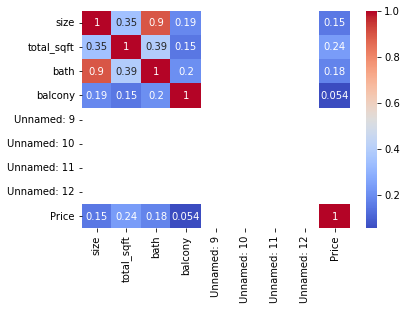

In [20]:
# check the correlation between the variables
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [21]:
# drop the null values 
print("before shape",data.shape)
data.drop(['price','bath','Unnamed: 12','Unnamed: 11', "Unnamed: 10","Unnamed: 9",'balcony'],axis=1, inplace=True)
print("after shape",data.shape)

before shape (13320, 14)
after shape (13320, 7)


<AxesSubplot:>

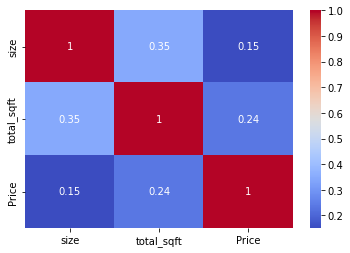

In [22]:

sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

In [23]:
# # data shape before the data
# print("before the cleaning the duplicates",data.shape)
# print("\n",data[data.duplicated()].count())
# print("--"*39)

# # removing duplicate values
# data = data.drop_duplicates(keep="last")
# print("data shape after duplicates removal", data.shape)


## filling the missing values

In [24]:
data.isna().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft        46
Price              0
dtype: int64

##### Location

In [25]:
# check the number values repeated most of the time
# print(data.location.value_counts())

# location variable missing one value, which can be filled with mode
# data['location'] = data.location.fillna(data.location.mode()[0])

# check if any nnull value
# data.location.isna().sum()

In [26]:
# data.fillna({'size':data['size'].median(),
#             #  'bath':data['bath'].median(),
#             'society': 'unknown',
#              'total_sqft': data['total_sqft'].median()
#           #    'balcony':data.balcony.median()
# },inplace=True)



# data = data.fillna(method='bfill')

data.dropna(axis=0, inplace=True)

data.isna().sum(), data.shape


(area_type       0
 availability    0
 location        0
 size            0
 society         0
 total_sqft      0
 Price           0
 dtype: int64,
 (7789, 7))

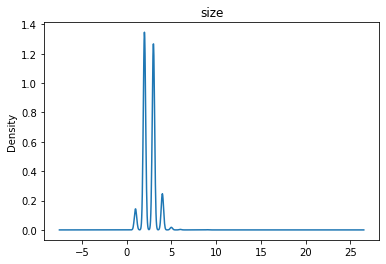

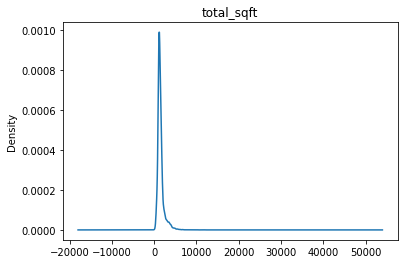

In [27]:
# data.balcony.plot.density()
# plt.title("Balconies")
# plt.show()

# df_random.Bedrooms.astype(float)
data['size'].plot.density()
plt.title("size")
plt.show()

data['total_sqft'].plot.density()
plt.title("total_sqft")
plt.show()

In [28]:
# check the desccription of numerical data
data.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

,size,total_sqft,Price
count,7789.000000,7789.000000,7789.000000
mean,2.565413,1549.521229,106.614585
std,0.788164,984.678169,491.793565
min,1.000000,11.000000,8.000000
0.1%,1.000000,392.032000,11.000000
1%,1.000000,525.000000,19.000000
10%,2.000000,950.000000,38.000000
25%,2.000000,1125.000000,50.000000
50%,3.000000,1326.000000,70.000000
75%,3.000000,1692.000000,110.000000


In [29]:
# sns.pairplot(data=data,hue='Price')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7789 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7789 non-null   object 
 1   availability  7789 non-null   object 
 2   location      7789 non-null   object 
 3   size          7789 non-null   float64
 4   society       7789 non-null   object 
 5   total_sqft    7789 non-null   float64
 6   Price         7789 non-null   float64
dtypes: float64(3), object(4)
memory usage: 486.8+ KB


# EDA

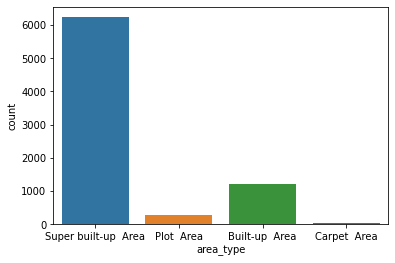

In [31]:
sns.countplot(data.area_type)
plt.show()

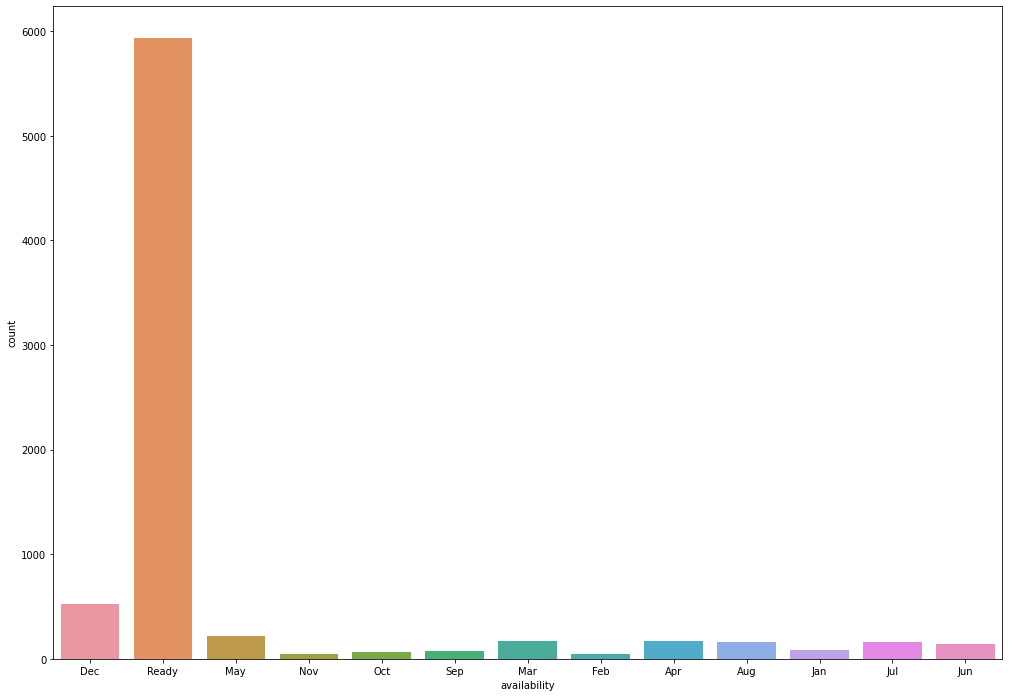

In [32]:
plt.figure(figsize=(17,12))
sns.countplot(x=data.availability)
plt.show()

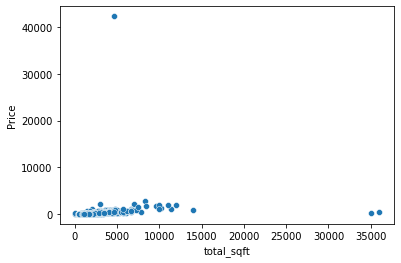

In [33]:
sns.scatterplot(data.total_sqft, data.Price)
plt.show()

In [34]:
data.head()

,area_type,availability,location,size,society,total_sqft,Price
0,Super built-up Area,Dec,Electronic City Phase II,2.0,random_society,1056.0,39.0
1,Plot Area,Ready,Chikka Tirupathi,4.0,Theanmp,2600.0,120.0
3,Super built-up Area,Ready,Lingadheeranahalli,3.0,Soiewre,1521.0,95.0
5,Super built-up Area,Ready,Whitefield,2.0,random_society,1170.0,38.0
6,Super built-up Area,May,Old Airport Road,4.0,Jaades,2732.0,204.0


count     7789.000000
mean       106.614585
std        491.793565
min          8.000000
25%         50.000000
50%         70.000000
75%        110.000000
max      42278.000000
Name: Price, dtype: float64


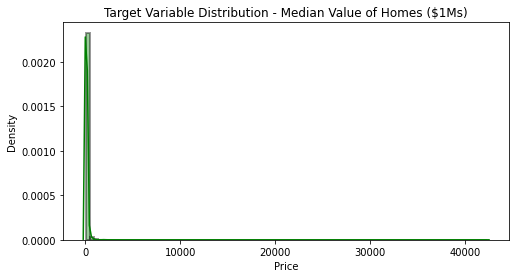

In [35]:
# thats clear that target column is right skewd
print(data.Price.describe())

#Let us first analyze the distribution of the target variable
plt.figure(figsize=[8,4])
sns.distplot(data['Price'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=100)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
# plt.xlim(-100,5000)
plt.show()

# Apply the Box-Cox Transformation

In [36]:
from scipy import stats
transformed_data, lambda_value = stats.boxcox(data['Price'])

print("Lambda value:", lambda_value)

# replace with original Price column
data['Price'] = transformed_data

Lambda value: -0.3112654888236359


### check the transformation

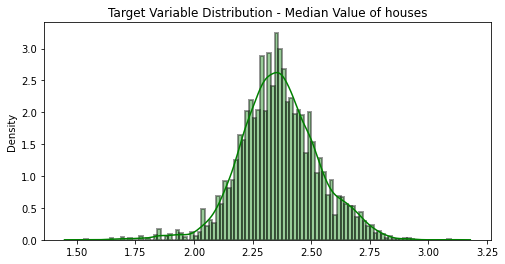

In [37]:
#Let us first analyze the distribution of the target variable
plt.figure(figsize=[8,4])
sns.distplot(transformed_data, color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=100)
plt.title('Target Variable Distribution - Median Value of houses')
# plt.xlim(-100,5000)
plt.show()

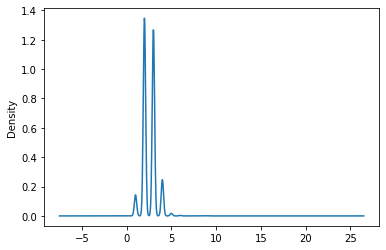

count    7789.000000
mean        2.565413
std         0.788164
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        18.000000
Name: size, dtype: float64

In [38]:
data['size'].plot.kde()
plt.show()
data['size'].describe()

count     7789.000000
mean      1549.521229
std        984.678169
min         11.000000
25%       1125.000000
50%       1326.000000
75%       1692.000000
max      36000.000000
Name: total_sqft, dtype: float64

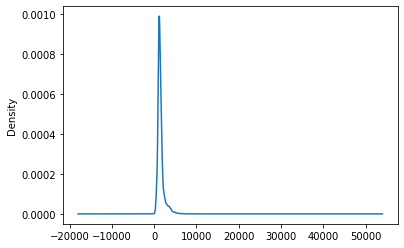

In [39]:
data.total_sqft.plot.kde()

data.total_sqft.describe()

In [40]:
data.reset_index(drop=True, inplace=True)

#  Seperate the X and Y variables
X= data.drop(['Price'],axis=1)
Y= data['Price']

In [41]:
data.head()

,area_type,availability,location,size,society,total_sqft,Price
0,Super built-up Area,Dec,Electronic City Phase II,2.0,random_society,1056.0,2.185561
1,Plot Area,Ready,Chikka Tirupathi,4.0,Theanmp,2600.0,2.488770
2,Super built-up Area,Ready,Lingadheeranahalli,3.0,Soiewre,1521.0,2.434168
3,Super built-up Area,Ready,Whitefield,2.0,random_society,1170.0,2.177223
4,Super built-up Area,May,Old Airport Road,4.0,Jaades,2732.0,2.598985


#### Outliers Treatment

In [42]:
num = X.select_dtypes('number')

# clip the outliers
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

# capping and flooring of 0.1% ensures the minimal SD impact on the dataset
num=num.apply(lambda x : outlier_cap(x))  

# dataset after outlier Treatment
num.describe([0.001,0.01, 0.1, 0.25, 0.5,0.75,0.95,0.99,0.999])

,size,total_sqft
count,7789.000000,7789.000000
mean,2.551034,1528.121145
std,0.721395,725.696331
min,1.000000,525.000000
0.1%,1.000000,525.000000
1%,1.000000,525.000000
10%,2.000000,950.000000
25%,2.000000,1125.000000
50%,3.000000,1326.000000
75%,3.000000,1692.000000


In [43]:
x_all = pd.concat([num,data.select_dtypes('O')],axis=1, join="inner")
x_all

,size,total_sqft,area_type,availability,location,society
0,2.0,1056.0,Super built-up Area,Dec,Electronic City Phase II,random_society
1,4.0,2600.0,Plot Area,Ready,Chikka Tirupathi,Theanmp
2,3.0,1521.0,Super built-up Area,Ready,Lingadheeranahalli,Soiewre
3,2.0,1170.0,Super built-up Area,Ready,Whitefield,random_society
4,4.0,2732.0,Super built-up Area,May,Old Airport Road,Jaades
...,...,...,...,...,...,...
7784,3.0,1345.0,Super built-up Area,Ready,Uttarahalli,Aklia R
7785,3.0,1715.0,Super built-up Area,Ready,Green Glen Layout,random_society
7786,4.0,3453.0,Built-up Area,Ready,Whitefield,random_society
7787,2.0,1141.0,Built-up Area,Ready,Raja Rajeshwari Nagar,random_society


### One Hot Encode

In [44]:
df = pd.get_dummies(x_all,drop_first=True)
df

,size,total_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Aug,availability_Dec,availability_Feb,availability_Jan,availability_Jul,...,society_Usquaya,society_VBn 2lm,society_VBownre,society_Vaharvi,society_Vaniai,society_ViensRK,society_ViistLa,society_Vrenty,society_Wiowsri,society_random_society
0,2.0,1056.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.0,2600.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1521.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1170.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.0,2732.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,3.0,1345.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7785,3.0,1715.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7786,4.0,3453.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7787,2.0,1141.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Scale the data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)

scaled_data = scaler.transform(df)

# create the dataframe  after scalling
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

# view the data
scaled_data

,size,total_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Aug,availability_Dec,availability_Feb,availability_Jan,availability_Jul,...,society_Usquaya,society_VBn 2lm,society_VBownre,society_Vaharvi,society_Vaniai,society_ViensRK,society_ViistLa,society_Vrenty,society_Wiowsri,society_random_society
0,-0.763893,-0.650618,-0.082771,-0.197355,0.499639,-0.144356,3.715910,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,0.993219
1,2.008690,1.477130,-0.082771,5.067017,-2.001445,-0.144356,-0.269113,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,-1.006828
2,0.622398,-0.009813,-0.082771,-0.197355,0.499639,-0.144356,-0.269113,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,-1.006828
3,-0.763893,-0.493518,-0.082771,-0.197355,0.499639,-0.144356,-0.269113,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,0.993219
4,2.008690,1.659036,-0.082771,-0.197355,0.499639,-0.144356,-0.269113,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,-1.006828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,0.622398,-0.252355,-0.082771,-0.197355,0.499639,-0.144356,-0.269113,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,-1.006828
7785,0.622398,0.257533,-0.082771,-0.197355,0.499639,-0.144356,-0.269113,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,0.993219
7786,2.008690,2.652628,-0.082771,-0.197355,-2.001445,-0.144356,-0.269113,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,0.993219
7787,-0.763893,-0.533482,-0.082771,-0.197355,-2.001445,-0.144356,-0.269113,-0.075373,-0.103149,-0.143892,...,-0.034012,-0.029992,-0.027765,-0.029992,-0.032065,-0.035854,-0.054421,-0.037606,-0.037606,0.993219


### Grouping similar houses into clusters using KMeans.

In [46]:
from sklearn.cluster import KMeans
features = scaled_data.columns

kmeans= KMeans(n_clusters=3)
kmeans.fit(scaled_data[features])

scaled_data['clusters']= kmeans.predict(scaled_data[features])

scaled_data['clusters']=kmeans.labels_

### PCA

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=269)


# fit
pca.fit(scaled_data)

# tramsform
x_pca = pca.transform(scaled_data)

scaled_data.shape, x_pca.shape

((7789, 555), (7789, 269))

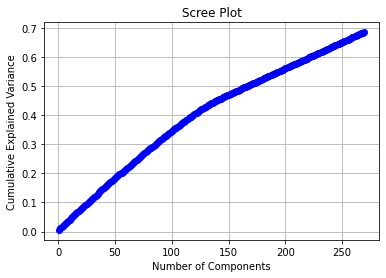

In [48]:

# Calculate the cumulative sum of explained variance ratios
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [49]:
# split the data in train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_pca,Y,test_size=0.25,random_state=44)

In [50]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (5841, 269)
Shape of Testing Data (1948, 269)
Response Rate in Training Data 2.36503300617288
Response Rate in Testing Data 2.363172766865435


# Model Building

## LinearRegression model

In [51]:

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# train the model
linear_model.fit(X_train,y_train)

# vlidate the model
linear_predict = linear_model.predict(X_test)

# check the performance of the Linear Regrssin model

r2_score(y_test,linear_predict)

# 0.466, 0.660, 0.683

0.7701370063966002

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [53]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)




def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared



mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
# print("-"*30)
# rmse_cross_val = rmse_cv(elastic_net)
# print("RMSE Cross-Validation:", rmse_cross_val)

# new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
# models = models.append(new_row, ignore_index=True)

MAE: 0.13034109264032054
MSE: 0.02800951461010932
RMSE: 0.16736043322753835
R2 Score: -0.00012356222215936796


## RandomForest model

In [59]:
random_forest = RandomForestRegressor(n_estimators=189)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("train score",random_forest.score(X_train,y_train))
print("-"*30)
print("validate score",random_forest.score(X_test,y_test))

# 0.7539195487111798

MAE: 0.04514211059708816
MSE: 0.004249881009302004
RMSE: 0.06519111142864496
R2 Score: 0.8482513462582693
train score 0.9675073640643495
------------------------------
validate score 0.8482513462582693


## XGBRegressor model

In [58]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("validate score",xgb.score(X_test,y_test))
print("-"*30)
print("train score",xgb.score(X_train,y_train))


# MAE: 40.221019288105055,MSE: 89365.30760632151,RMSE: 298.94030776447914,R2 Score: -3.1183823471835277
# MAE: 0.06275539603832402,MSE: 0.007064704539339485,RMSE: 0.0840517967644921,R2 Score: 0.7719566613353094, 0.7809523494701403, 0.7951

MAE: 0.0425782311237775
MSE: 0.0035848652498573367
RMSE: 0.05987374424451286
R2 Score: 0.871996774893067
validate score 0.871996774893067
------------------------------
train score 0.9351909192063534


## SVR model

In [54]:
svr = SVR()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("validate score",svr.score(X_test,y_test))
print("-"*30)
print("train score",svr.score(X_train,y_train))


# MAE: 0.0.734276126084434814,MSE: 0.018149088024091638,RMSE: 0.0102722993176292,R2 Score: 0.6644509064758184, 0.7015,0.7358526737107199


MAE: 0.06135414941432243
MSE: 0.006113657040472437
RMSE: 0.07818987812033242
R2 Score: 0.78170230571168
validate score 0.78170230571168
------------------------------
train score 0.8054687052091203


# LightGBM model

In [55]:
import lightgbm as lgb

# Define the params for gbm
params = {
    'objective': 'regression',
    'metric': 'mse',
    'lambda_l2':0.24
    # Add other parameters as per your requirement
}

# create lightgbm train and test
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# train the gbm
model = lgb.train(params, train_data, num_boost_round=100)

# Make prediction
y_pred = model.predict(X_test)


mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
# MAE: 0.06159028696466234,MSE: 0.00699941289600708,RMSE: 0.08366249396239082,R2 Score: 0.7740642263791857

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68595
[LightGBM] [Info] Number of data points in the train set: 5841, number of used features: 269
[LightGBM] [Info] Start training from score 2.365033
MAE: 0.06135414941432243
MSE: 0.006113657040472437
RMSE: 0.07818987812033242
R2 Score: 0.78170230571168


# KNN model

In [56]:
from sklearn.neighbors import KNeighborsRegressor
# Create and train the KNN regression model
k = 4  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)


MAE: 0.05567936273440749
MSE: 0.006625193128646831
RMSE: 0.08139528935169917
R2 Score: 0.7634371089800839
